# IEEE SMC

Notebook that does the processing and generates the figures used in the IEEE SMC paper. Note that the subjects used are a subset of the subjects in the complete analysis.

## Import libraries


In [14]:
# Import modules
import sys
import json
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import custom 
sys.path.append("..") # Adds higher directory to python modules path.
from Functions import data_tools
from Functions import unity_analysis

## Import data

In [15]:
# Import data
file = open("..\subjects.json")
json_data = json.load(file)

p300_trials = json_data["ieee_p300"]
ssvep_trials = json_data["ieee_ssvep"]

p300_nsubjects = len(p300_trials)
ssvep_nsubjects = len(ssvep_trials)

# Preallocate variables
p300_unity_stream = [None] * p300_nsubjects
ssvep_unity_stream = [None] * ssvep_nsubjects

print("P300 trials")
for i, (key, value) in enumerate(p300_trials.items()):
    trial = f"..\\Data\\{key}\\eeg\\{value}"
    print(f"- Importing: {trial}")
    [_,_,p300_unity_stream[i]] = data_tools.import_data(f"..\\Data\\{key}\\eeg\\{value}")

print("\nSSVEP trials")
for i, (key, value) in enumerate(ssvep_trials.items()):
    trial = f"..\\Data\\{key}\\eeg\\{value}"
    print(f"- Importing: {trial}")
    [_,_,ssvep_unity_stream[i]] = data_tools.import_data(f"..\\Data\\{key}\\eeg\\{value}")

P300 trials
- Importing: ..\Data\sub-P003/ses-S004\eeg\sub-P003_ses-S004_task-T1_run-001_eeg.xdf
Creating RawArray with float64 data, n_channels=23, n_times=307961
    Range : 0 ... 307960 =      0.000 ...  1026.533 secs
Ready.
- Importing: ..\Data\sub-P007/ses-S004\eeg\sub-P007_ses-S004_task-T1_run-001_eeg.xdf
Creating RawArray with float64 data, n_channels=23, n_times=323557
    Range : 0 ... 323556 =      0.000 ...  1078.520 secs
Ready.
- Importing: ..\Data\sub-P008/ses-S001\eeg\sub-P008_ses-S001_task-T1_run-001_eeg.xdf
Creating RawArray with float64 data, n_channels=23, n_times=423457
    Range : 0 ... 423456 =      0.000 ...  1411.520 secs
Ready.
- Importing: ..\Data\sub-P009/ses-S004\eeg\sub-P009_ses-S004_task-T1_run-001_eeg.xdf
Creating RawArray with float64 data, n_channels=23, n_times=330461
    Range : 0 ... 330460 =      0.000 ...  1101.533 secs
Ready.
- Importing: ..\Data\sub-P010/ses-S005\eeg\sub-P010_ses-S005_task-T1_run-001_eeg.xdf
Creating RawArray with float64 data, n_

# P300

## Number of selections

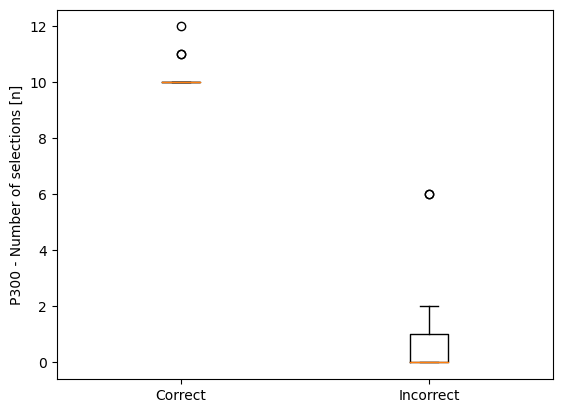

In [16]:
# Settings
plot_bar = True

total_list = unity_analysis.total_metrics(p300_unity_stream)   # List of subjects
total_np = np.concatenate(total_list,axis=0)

if plot_bar:
    fig, ax = plt.subplots()
    plt.boxplot(total_np)
    # ax = sns.violinplot(total_np)
    ax.set_xticks([1,2], ["Correct", "Incorrect"])
    ax.set_ylabel('P300 - Number of selections [n]')

## Accuracy

Total accuracy: 0.27 ± 0.02 [Mean ± SEM]


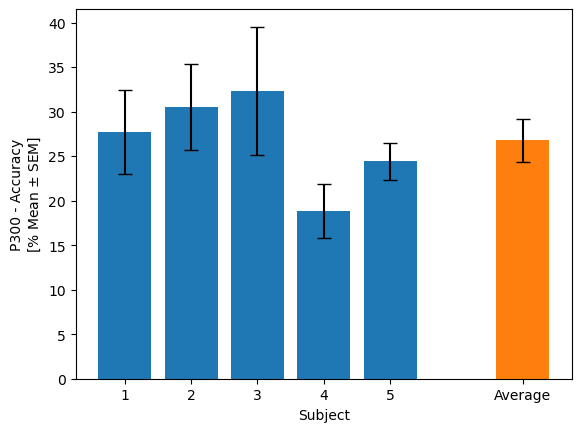

In [23]:
plot_accuracies =True

# Preallocate variables
mean_acc_per_subject = np.zeros(len(total_list))
sem_acc_per_subject = np.zeros(len(total_list))

for (s,subject) in enumerate(total_list):
    temp_accuracy = subject[:,0] / np.sum(subject, axis=1)
    mean_acc_per_subject[s] = np.mean(temp_accuracy)
    sem_acc_per_subject[s] = np.std(temp_accuracy) / np.sqrt(len(temp_accuracy))

# Total accuracy
total_acc = total_np[:,0] / np.sum(total_np, axis=1)
print(f'Total accuracy: {np.mean(total_acc):0.2f} ± {np.std(total_acc)/np.sqrt(np.shape(total_acc)[0]):0.2f} [Mean ± SEM]')

if plot_accuracies:
    fig, ax = plt.subplots()
    
    ax.bar(
        x=np.arange(p300_nsubjects),
        height=mean_acc_per_subject*100,
        yerr=sem_acc_per_subject*100,
        capsize=5)
    ax.set_xlabel("Subject")
    ax.set_ylabel("P300 - Accuracy\n[% Mean $\pm$ SEM]")
    # plt.tight_layout()

    # Mean value
    x_loc = p300_nsubjects+1
    ax.bar(x=x_loc,
           height=np.mean(mean_acc_per_subject)*100,
           yerr = stats.sem(mean_acc_per_subject)*100,
           capsize=5)
    
    # Set labels
    xtics = np.arange(p300_nsubjects)
    xtics = np.append(xtics, p300_nsubjects+1)
    ax.set_xticks(xtics)
    
    xticklabels = [str(s+1) for s in range(p300_nsubjects)]
    xticklabels.append("Average")
    ax.set_xticklabels(xticklabels)


# SSVEP

## Number of selections

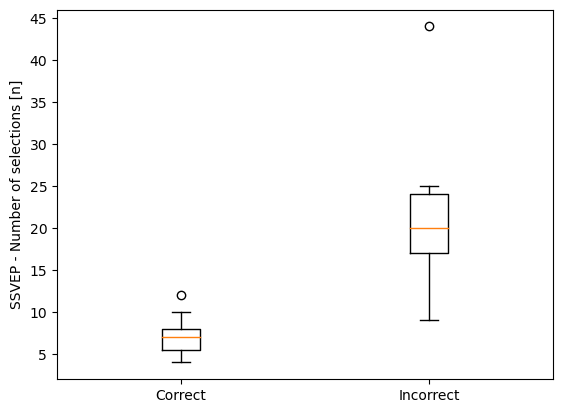

In [18]:
# Settings
plot_bar = True

# Organize pipelines per subject
ssvep_nsubjects = len(list(set([val.split("_")[0].split('-')[-1] for (_,val) in ssvep_trials.items()])))

total_list = unity_analysis.total_metrics(ssvep_unity_stream)   # List of subjects
total_np = np.concatenate(total_list,axis=0)

if plot_bar:
    fig, ax = plt.subplots()
    plt.boxplot(total_np)
    # ax = sns.violinplot(total_np)
    ax.set_xticks([1,2], ["Correct", "Incorrect"])
    ax.set_ylabel('SSVEP - Number of selections [n]')

## Accuracy

In [19]:
# Organize pipelines per subject
ssvep_nsubjects = len(list(set([val.split("_")[0].split('-')[-1] for (_,val) in ssvep_trials.items()])))
total_list = [None] * ssvep_nsubjects 
list_idx = 0

for (s,(key,subject)) in enumerate(ssvep_trials.items()):
    if (s == 0):
        total_list[list_idx] = unity_analysis.total_metrics([ssvep_unity_stream[s]])
    if (s >= 1):
        curr_id = subject.split('_')[0].split('-')[-1]
        prev_id = list(ssvep_trials.values())[s-1].split('_')[0].split('-')[-1]
        if (curr_id != prev_id):
            list_idx += 1
            total_list[list_idx] = unity_analysis.total_metrics([ssvep_unity_stream[s]])
        else:
            append_vals = unity_analysis.total_metrics([ssvep_unity_stream[s]])
            total_list[list_idx].append(append_vals[0])

# Organize lists in numpy array
for (l,lists) in enumerate(total_list):
    # if len(lists) > 1:
    total_list[l] = np.reshape(lists, (-1,2))

Total accuracy: 0.27 ± 0.02 [Mean ± SEM]


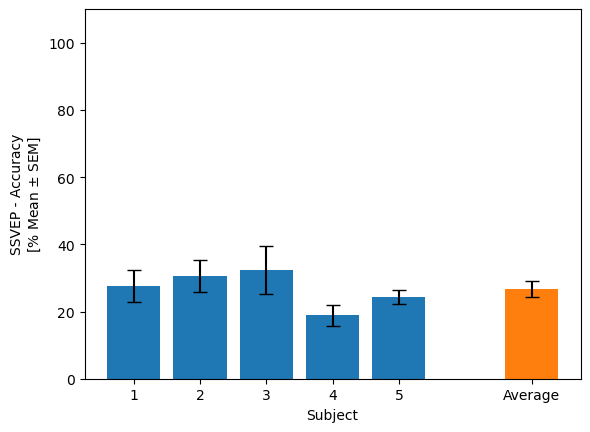

In [24]:
plot_accuracies =True
            
# Preallocate variables
ssvep_nsubjects = len(list(set([val.split("_")[0].split('-')[-1] for (_,val) in ssvep_trials.items()])))
mean_acc_per_subject = np.zeros(ssvep_nsubjects)
sem_acc_per_subject = np.zeros(ssvep_nsubjects)

for (s,subject) in enumerate(total_list):
    temp_accuracy = subject[:,0] / np.sum(subject, axis=1)
    mean_acc_per_subject[s] = np.mean(temp_accuracy)
    sem_acc_per_subject[s] = np.std(temp_accuracy) / np.sqrt(len(temp_accuracy))

# Total accuracy
total_acc = total_np[:,0] / np.sum(total_np, axis=1)
print(f'Total accuracy: {np.mean(total_acc):0.2f} ± {np.std(total_acc)/np.sqrt(np.shape(total_acc)[0]):0.2f} [Mean ± SEM]')

if plot_accuracies:
    fig, ax = plt.subplots()
    
    ax.bar(
        x=np.arange(ssvep_nsubjects),
        height=mean_acc_per_subject*100,
        yerr=sem_acc_per_subject*100,
        capsize=5)
    ax.set_xlabel("Subject")
    ax.set_ylabel("SSVEP - Accuracy\n[% Mean $\pm$ SEM]")
    # plt.tight_layout()

    # Mean value
    x_loc = p300_nsubjects+1
    ax.bar(x=x_loc,
           height=np.mean(mean_acc_per_subject)*100,
           yerr = stats.sem(mean_acc_per_subject)*100,
           capsize=5)
    ax.set_ylim((0,110))

        
    # Set labels
    xtics = np.arange(p300_nsubjects)
    xtics = np.append(xtics, p300_nsubjects+1)
    ax.set_xticks(xtics)
    
    xticklabels = [str(s+1) for s in range(p300_nsubjects)]
    xticklabels.append("Average")
    ax.set_xticklabels(xticklabels)